In [0]:
from __future__ import print_function, division
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
use_gpu = torch.cuda.is_available()

## Get Id of default device

# 0
# '0' is the id of your GPU
# Tesla K80


In [0]:
! git clone https://github.com/sawood14012/dataset.git

fatal: destination path 'dataset' already exists and is not an empty directory.


In [0]:
! ls
# the path to the directory containing the current file
#dir_path = os.path.dirname(os.path.realpath('recommlivhack'))
dir_path = 'dataset'

data_transform = transforms.Compose([
        transforms.RandomResizedCrop(200),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

#data_transform = transforms.Compose(
#    [transforms.ToTensor(),
#     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

dataset  sample_data


In [0]:
#Ive set the directory path as dir_path, you will have to put the code in the same folder as dir_path. Images and test data set is in dataset/train
trainset = datasets.ImageFolder(root=dir_path+'/dataset/train', transform=data_transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=4)
print("Trainloader loaded, ready")

testset = datasets.ImageFolder(root=dir_path+'/dataset/test', transform=data_transform) 

testloader = { x:torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=4) for x in ['train', 'valid', 'test']}
print("Testloader loaded, ready")

Trainloader loaded, ready
Testloader loaded, ready


In [0]:
classes = ["bed","chair","sofa","swivelchair","table"]
num_of_classes = len(classes)

In [0]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = model.state_dict()
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('---------')

        # Each epoch has a training phase
        scheduler.step()
        model.train(True)  # Set model to training mode
        running_loss = 0.0
        running_corrects = 0

        # Iterate over data.
        for data in trainloader:
            # get the inputs
            inputs, labels = data
            inputs, labels = Variable(inputs), Variable(labels)
            
            if use_gpu:
                inputs = Variable(inputs.cuda())
                labels = Variable(labels.cuda())
            # zero the parameter gradients
            optimizer.zero_grad()
            #SoftMax function
            m = nn.LogSoftmax()
            outputs = model(inputs)
            _, preds = torch.max(outputs.data, 1)
            loss = criterion(m(outputs), labels)
            # backward prop
            loss.backward()
            optimizer.step()
            # value check on stats
            running_loss += loss.data
            running_corrects += torch.sum(preds == labels.data)
            epoch_loss = running_loss / len(trainset)
            epoch_acc = running_corrects / len(trainset)
            print('{} Loss: {:.4f} Acc: {:.4f}'.format("Training : ", epoch_loss, epoch_acc))

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [0]:
# transfer learning with resnet18
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, num_of_classes)

if use_gpu:
    model_ft = model_ft.cuda()

In [0]:

criterion = nn.NLLLoss()

#  parameters need to be optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9) #if this doesnt optimize, use the Adam optimizer instead of SGD

In [0]:
# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [0]:
# train model
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,num_epochs=15)

Epoch 0/14
---------


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:32: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Training :  Loss: 0.0001 Acc: 0.0000
Training :  Loss: 0.0002 Acc: 0.0000
Training :  Loss: 0.0002 Acc: 0.0000
Training :  Loss: 0.0002 Acc: 0.0000
Training :  Loss: 0.0004 Acc: 0.0000
Training :  Loss: 0.0005 Acc: 0.0000
Training :  Loss: 0.0005 Acc: 0.0000
Training :  Loss: 0.0005 Acc: 0.0000
Training :  Loss: 0.0006 Acc: 0.0000
Training :  Loss: 0.0006 Acc: 0.0000
Training :  Loss: 0.0008 Acc: 0.0000
Training :  Loss: 0.0009 Acc: 0.0000
Training :  Loss: 0.0011 Acc: 0.0000
Training :  Loss: 0.0011 Acc: 0.0000
Training :  Loss: 0.0011 Acc: 0.0000
Training :  Loss: 0.0012 Acc: 0.0000
Training :  Loss: 0.0014 Acc: 0.0000
Training :  Loss: 0.0014 Acc: 0.0000
Training :  Loss: 0.0014 Acc: 0.0000
Training :  Loss: 0.0014 Acc: 0.0000
Training :  Loss: 0.0014 Acc: 0.0000
Training :  Loss: 0.0015 Acc: 0.0000
Training :  Loss: 0.0015 Acc: 0.0000
Training :  Loss: 0.0016 Acc: 0.0000
Training :  Loss: 0.0016 Acc: 0.0000
Training :  Loss: 0.0016 Acc: 0.0000
Training :  Loss: 0.0016 Acc: 0.0000
T

In [0]:
gamma = 'bed'

In [0]:
torch.save(model_ft.state_dict(),'model.pth')
torch.save({'arch': 'vgg19',
            'state_dict': model_ft.state_dict()}, 
            'classifier.pth')

In [0]:
data = 'dataset/dataset/test'

def calc_accuracy(model, data, cuda=True):
    model.eval()
    model.to(device='cuda')    
    
    with torch.no_grad():
        for idx, (inputs, labels) in enumerate(testloader[data]):
            if cuda:
                inputs, labels = inputs.cuda(), labels.cuda()
            # obtain the outputs from the model
            outputs = model.forward(inputs)
            # max provides the (maximum probability, max value)
            _, predicted = outputs.max(dim=1)
            # check the 
            if idx == 0:
                print(predicted) #the predicted class
                print(torch.exp(_)) # the predicted probability
            equals = predicted == labels.data
            if idx == 0:
                print(equals)
            print(equals.float().mean())

            

calc_accuracy(model_ft,"test")

tensor([2, 1, 4, 2], device='cuda:0')
tensor([ 511.7035,  271.5942,  101.8070, 1383.8616], device='cuda:0')
tensor([1, 1, 1, 1], device='cuda:0', dtype=torch.uint8)
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(0.7500, device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(0.7500, device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(0.7500, device='cuda:0')
tensor(1., device='cuda:0')
tensor(0.7500, device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(0.7500, device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
ten

In [0]:
from collections import OrderedDict
def load_model():
    chpt = torch.load('classifier.pth')
    
    if chpt['arch'] == 'vgg19':
        model = models.resnet18(pretrained=True)
        for param in model.parameters():
            param.requires_grad = False
    
    
    
   # model.class_to_idx = chpt['class_to_idx']
    
    # Create the classifier
    model.fc = nn.Sequential(OrderedDict([
                          ('fc1', nn.Linear(25088, 4096)),
                          ('relu', nn.ReLU()),
                          ('fc2', nn.Linear(4096, 102)),
                          ('output', nn.LogSoftmax(dim=1))
                          ]))
    # Put the classifier on the pretrained network
    #model.classifier = classifier
    criterion = nn.NLLLoss()
    optimizer = optim.Adam(model.fc.parameters(), lr=0.003)
    
    
    model.load_state_dict(chpt['state_dict'],strict=False)
    
    return model
  
load_model()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [0]:
def cnnmodel(i):
  if i=='bed':
    imagepath='dataset/dataset/test/bed'
  elif i=='chair':
    imagepath='dataset/dataset/test/chair'
  elif i=='sofa':
    imagepath='dataset/dataset/test/sofa'
  elif i=='swivelchair':
    imagepath='dataset/dataset/test/swivelchair'
  elif i=='table':
    imagepath='dataset/dataset/test/table'
  
  return imagepath

def randomclassifier(imagepath):
    import random
    files = os.listdir(imagepath)
    li = random.sample(range(0,len(files)),5)
    names = []
    for i in li:
      names.append(files[i])
    return names

In [0]:
def process_image(image_path):
    ''' 
    Scales, crops, and normalizes a PIL image for a PyTorch       
    model, returns an Numpy array
    '''
    # Open the image
    from PIL import Image
    img = Image.open(image_path)
    # Resize
    if img.size[0] > img.size[1]:
        img.thumbnail((10000, 256))
    else:
        img.thumbnail((256, 10000))
    # Crop 
    left_margin = (img.width-224)/2
    bottom_margin = (img.height-224)/2
    right_margin = left_margin + 224
    top_margin = bottom_margin + 224
    img = img.crop((left_margin, bottom_margin, right_margin,   
                      top_margin))
    # Normalize
    img = np.array(img)/255
    mean = np.array([0.485, 0.456, 0.406]) #provided mean
    std = np.array([0.229, 0.224, 0.225]) #provided std
    img = (img - mean)/std
    
    # Move color channels to first dimension as expected by PyTorch
    img = img.transpose((2, 0, 1))
    
    return img

In [0]:
def imshow(image, ax=None, title=None):
    if ax is None:
        fig, ax = plt.subplots()
    if title:
        plt.title(title)
    # PyTorch tensors assume the color channel is first
    # but matplotlib assumes is the third dimension
    image = image.transpose((1, 2, 0))
    
    # Undo preprocessing
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    
    # Image needs to be clipped between 0 and 1
    image = np.clip(image, 0, 1)
    
    ax.imshow(image)
    
    return ax


In [0]:
def k_classiflivhacier(li,imgpt):
  for i in li:
    print(imgpt+'/'+i)
    a=process_image(imgpt+'/'+i)
    imshow(a)
    

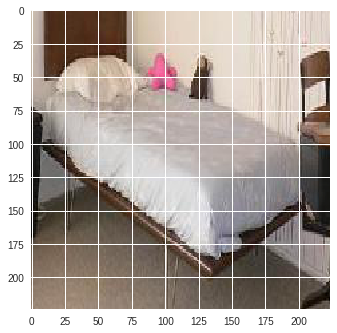

In [0]:
image_path = 'dataset/dataset/test/bed/00000013.jpg'
img = process_image(image_path)
imshow(img)


In [0]:
def predict(image_path, model,gamma,top_num=5):
    # Process image
    img = process_image(image_path)
    
    # Numpy -> Tensor
    image_tensor = torch.from_numpy(img).type(torch.cuda.FloatTensor)
    # Add batch of size 1 to image
    model_input = image_tensor.unsqueeze(0)
    
    # Probs
    probs = torch.exp(model.forward(model_input))
    
    # Top probs
    top_probs, top_labs = probs.topk(top_num)
    top_probs
    top_probs = top_probs.detach().tolist() 
    top_labs = top_labs.detach().tolist()
    imagepath = cnnmodel(gamma)
    print (top_probs,top_labs)
    # Convert indices to classes
   # idx_to_class = {val: key for key, val in    
                                      # model.class_to_idx.items()}
   # top_labels = [idx_to_class[lab] for lab in top_labs]
   # top_flowers = [label_map[idx_to_class[lab]] for lab in top_labs]
    return top_probs, top_labs,imagepath #top_flowers

In [0]:
def plot_solution(image,path, model):
    # Set up plot
    plt.figure(figsize = (6,10))
    ax = plt.subplot(2,1,1)
    # Set up title
    #flower_num = image
    #title_ = label_map[flower_num]
    title_ = image
    # Plot flower
    img = process_image(path+image)
    imshow(img, ax, title = title_);
    # Make prediction
    probs, labs,imgpt = predict(path+image, model,gamma) 
    # Plot bar chart
    print(imgpt)
    listofcnn = randomclassifier(imgpt)
    print(listofcnn)
    k_classiflivhacier(listofcnn,imgpt)
    #plt.subplot(2,1,2)
    #sns.barplot(x=probs, y=labs, color=sns.color_palette()[0]);
    #plt.show()
    
    probs,labs

recommandations
[[21474.03515625, 0.7976523637771606, 0.22944189608097076, 0.04281806945800781, 0.007587365340441465]] [[0, 2, 1, 4, 3]]
[[21474.03515625, 0.7976523637771606, 0.22944189608097076, 0.04281806945800781, 0.007587365340441465]] [[0, 2, 1, 4, 3]]
dataset/dataset/test/bed
['00000111.jpg', '00000677.jpg', '00000848.jpg', '00000297.jpg', '00001432.jpg']
dataset/dataset/test/bed/00000111.jpg
dataset/dataset/test/bed/00000677.jpg
dataset/dataset/test/bed/00000848.jpg
dataset/dataset/test/bed/00000297.jpg
dataset/dataset/test/bed/00001432.jpg


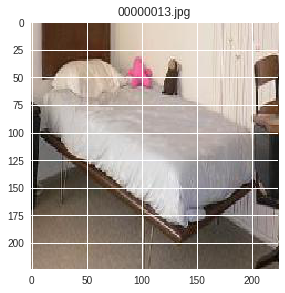

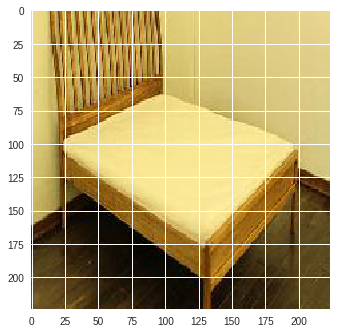

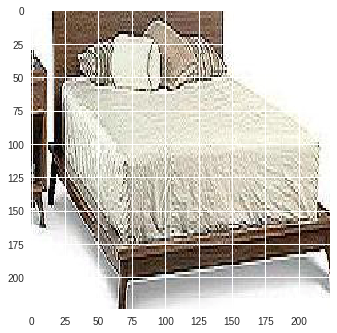

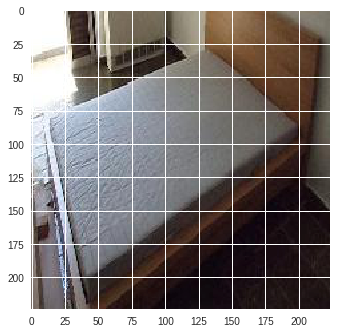

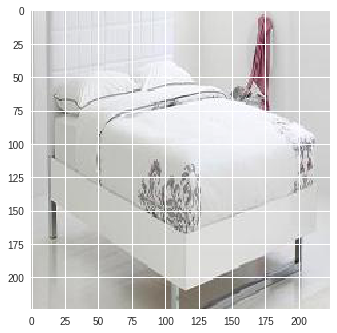

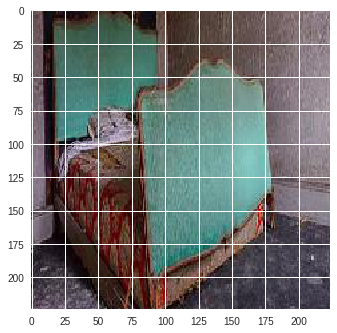

In [0]:
import seaborn as sns
path = 'dataset/dataset/test/'+gamma+'/'
image = '00000013.jpg'
model = model_ft
print ('recommandations')
predict(path+image,model,gamma)
plot_solution(image,path,model)
